In [33]:
#TANASSA KAWTAR mini project
# : AMAZON 

In [34]:
# importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Charger le fichier CSV
df = pd.read_csv('amazon.csv')
# vérification si le fichier a été chargé 
print(df.head())
 #finma ban lik shi package d jupyter installih taykhdm lik 

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

In [36]:
#Top 5 des meilleures catégories :
# Compter le nombre d'occurrences de chaque catégorie
top_categories = df['listed_in'].value_counts().head(5)

# Afficher les résultats
print("Top 5 des meilleures catégories :")
print(top_categories)


Top 5 des meilleures catégories :
listed_in
Drama              986
Comedy             536
Drama, Suspense    399
Comedy, Drama      377
Animation, Kids    356
Name: count, dtype: int64


In [37]:
#Top 5 des meilleures catégories :
# Compter le nombre d'occurrences de chaque directeur
top_directors = df['director'].value_counts().head(5)
print(top_directors)


director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


In [38]:
#top 10 actors
# Compter le nombre d'occurrences de chaque acteur
top_actors = df['cast'].value_counts().head(10)
top_actors


cast
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
Gallagher                            9
LB, Aaron Michael                    9
Eddie Izzard                         9
Name: count, dtype: int64

In [39]:
#Top 5 sereis 
# Filtrer les entrées pour ne considérer que les séries TV
tv_shows = df[df['type'] == 'TV Show']

# Trier les séries TV par nombre de saisons en ordre décroissant
top_tv_shows = tv_shows.sort_values(by='duration', ascending=False).head(5)
top_tv_shows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
800,s801,TV Show,Teen Wolf,NaN,"Tyler Posey, Holland Roden, Shelley Hennig, Dy...",NaN,NaN,2017,TV-14,9 Seasons,TV Shows,"On the eve of their departure, Scott and his p..."
185,s186,TV Show,Vikings,NaN,"Alex Høgh, Alexander Ludwig, Jasper Pääkkönen",NaN,NaN,2020,TV-14,9 Seasons,"Action, Drama",Season six returns following the battle betwee...
1081,s1082,TV Show,Scrubs,NaN,"Zach Braff, Donald Faison, Sarah Chalke, Ken J...",NaN,NaN,2010,TV-14,9 Seasons,Comedy,The doctors are ready to see you now. And this...
3571,s3572,TV Show,'Allo 'Allo!,NaN,"Gorden Kaye, Guy Siner, Jeremy Lloyd, Kirsten ...",NaN,NaN,1992,13+,9 Seasons,Comedy,Wartime sitcom about the French Resistance sta...
867,s868,TV Show,Suits,NaN,"Gabriel Macht, Rick Hoffman, Sarah Rafferty, D...",NaN,NaN,2019,NR,9 Seasons,Drama,Suits centers on a fast-paced Manhattan corpor...


In [40]:
#'identifier des contenus similaires en faisant correspondre des caractéristiques textuelles
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Créer une instance de CountVectorizer pour convertir les descriptions en vecteurs de mots
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(df['description'].fillna(''))

# Calculer la similarité cosinus entre les descriptions
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Créer une série Pandas avec l'index des titres et les valeurs des descriptions
indices = pd.Series(df.index, index=df['title'])

# Définir une fonction pour obtenir les contenus similaires
def get_similar_titles(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    content_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[content_indices]

# Exemple d'utilisation : trouver les contenus similaires à un titre donné
similar_titles = get_similar_titles('Hired Gun')
similar_titles


6083        Mary J. Blige’s My Life
3694               April Fool's Day
6708         Mrs. Whittle's Cottage
2798        Cómo Sobrevivir Soltero
457           The Secret Life of Us
8473                             GD
473                 The Raveonettes
4798     The History of Time Travel
2172                 How We Got Gay
2051    Jay Mohr: American Treasure
Name: title, dtype: object

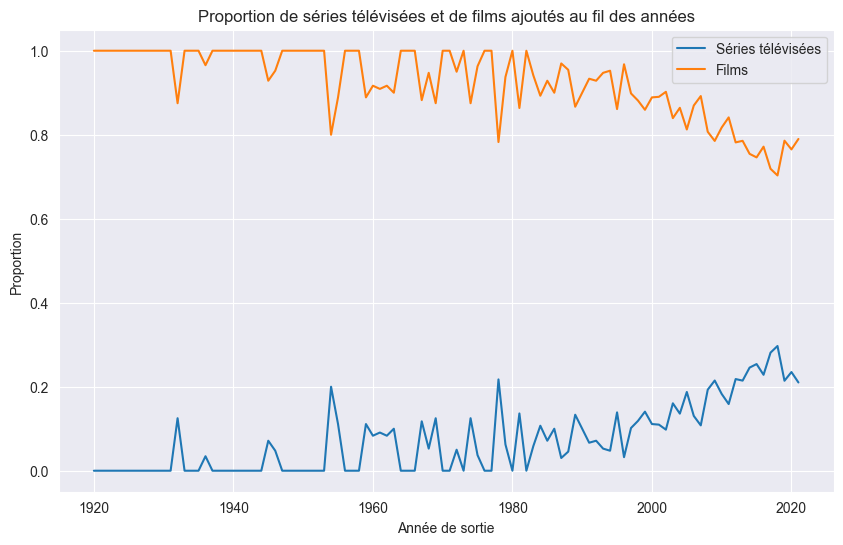

In [41]:
#amazon se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('amazon.csv')

# Grouper les données par année de sortie (release_year) et par catégorie (type)
content_by_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Calculer le total de contenus ajoutés par année
content_by_year['total'] = content_by_year.sum(axis=1)

# Calculer la proportion de séries télévisées et de films ajoutés chaque année
content_by_year['tv_show_ratio'] = content_by_year['TV Show'] / content_by_year['total']
content_by_year['movie_ratio'] = content_by_year['Movie'] / content_by_year['total']

# Tracer les proportions de séries télévisées et de films ajoutés au fil des années
plt.figure(figsize=(10, 6))
plt.plot(content_by_year.index, content_by_year['tv_show_ratio'], label='Séries télévisées')
plt.plot(content_by_year.index, content_by_year['movie_ratio'], label='Films')
plt.title("Proportion de séries télévisées et de films ajoutés au fil des années")
plt.xlabel("Année de sortie")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)
plt.show()
